In [1]:
import numpy as np
import scipy as sp
from matplotlib.pyplot import cm
# my libraries import 
import preprocessing as prep
import plot as plt
import mvg
import utility as util
import logistic_regression as lr
import dcf 
import gmm 
import svm
import pickle

from copy import deepcopy

# dataset path
fileTR = './data/Train.txt'
fileTE = './data/Train.txt'

# load dataset
DTR, LTR = prep.load_dataset(fileTR)
DTE, LTE = prep.load_dataset(fileTE)

applications = [(0.5, 1, 1), (0.1, 1, 1), (0.9, 1, 1)]

# n - folds
k = 4
# split DTR 
folds, folds_labels = prep.make_folds(DTR, LTR, k)
labels = np.hstack(folds_labels).ravel()

fold: 0  -  (12, 1500)
fold: 1  -  (12, 1500)
fold: 2  -  (12, 1500)
fold: 3  -  (12, 1500)


# Calibration and Evaluation Plots
## Best models DET, ROC plots 
### GMM 4C tied full vs Linear Logistic Regression

Plotting ROC plot...


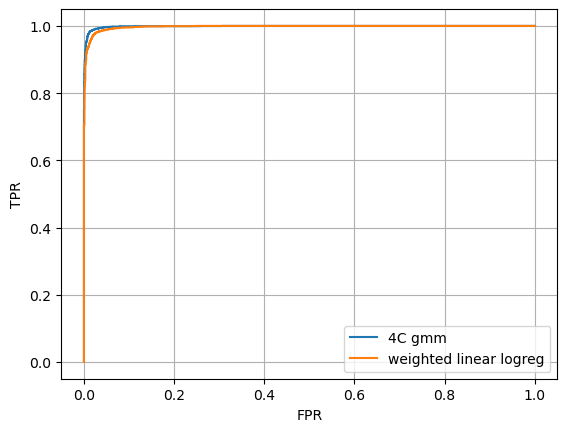

Plotting Bayes Error plot...


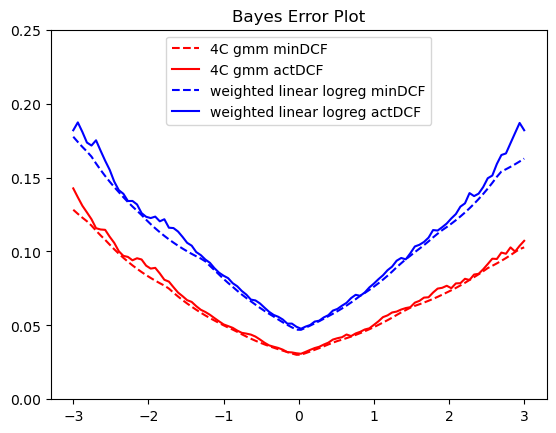

Plotting DET plot...


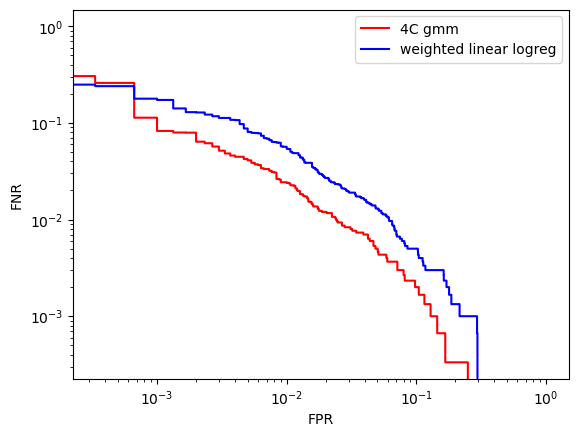

application: (0.5, 1, 1)
	Actual DCF for GMM 4C Tied: 0.030666666666666665
	Min DCF for GMM 4C Tied: 0.029666666666666668
	------------------------------------
	Actual DCF for Linear LogReg: 0.04733333333333334
	Min DCF for Linear LogReg: 0.04633333333333333
	------------------------------------
application: (0.1, 1, 1)
	Actual DCF for GMM 4C Tied: 0.09566666666666668
	Min DCF for GMM 4C Tied: 0.09000000000000001
	------------------------------------
	Actual DCF for Linear LogReg: 0.13266666666666665
	Min DCF for Linear LogReg: 0.12966666666666668
	------------------------------------
application: (0.9, 1, 1)
	Actual DCF for GMM 4C Tied: 0.08066666666666668
	Min DCF for GMM 4C Tied: 0.07833333333333332
	------------------------------------
	Actual DCF for Linear LogReg: 0.13133333333333336
	Min DCF for Linear LogReg: 0.12566666666666668
	------------------------------------


In [24]:
DET = True

z_gmm_llrs = np.load("./results/gmm/llrs_z_norm-gmm-32-full-tied.npy")
z_4c_gmm_llrs = z_gmm_llrs[:,2,:]
llrs_gmm = np.hstack(z_4c_gmm_llrs)

z_linear_logreg = util.pickle_load("./results/logreg/weighted-z-norm-scores_linear.bin")
logreg_scores = z_linear_logreg[applications[0]][0.5]

if DET:
    plot_labels = ["4C gmm", "weighted linear logreg"]
    print("Plotting ROC plot...")
    plt.plot_ROC([llrs_gmm, logreg_scores], labels, plot_labels)
    print("Plotting Bayes Error plot...")
    plt.bayes_error_plot([llrs_gmm, logreg_scores], labels, plot_labels, [False, False])
    print("Plotting DET plot...")
    plt.plot_DET([llrs_gmm, logreg_scores], labels, plot_labels)

dcf.compute_act_min_DCFs_from_scores([llrs_gmm, logreg_scores], labels, applications, ["GMM 4C Tied", "Linear LogReg"])

### GMM vs MVG (full-tied)

(6000,) (6000,)
Plotting ROC plot...


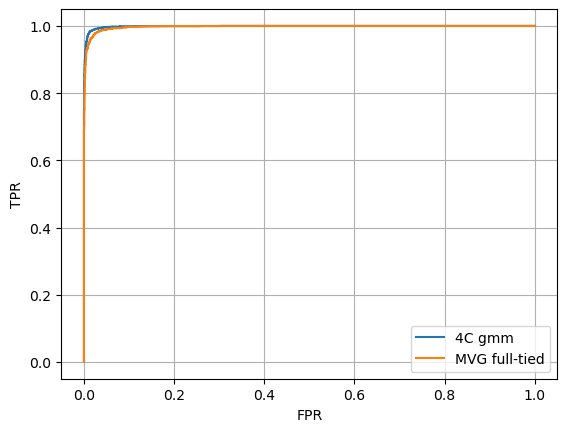

Plotting Bayes Error plot...


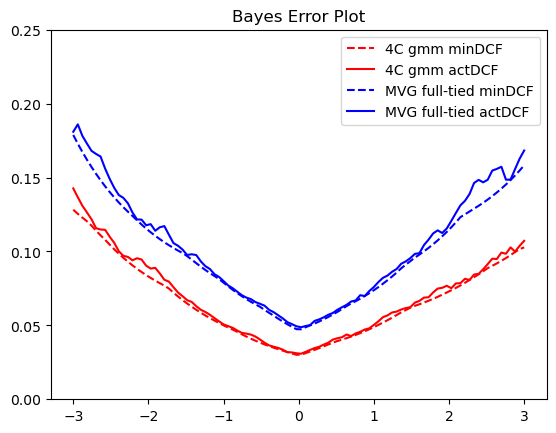

Plotting DET plot...


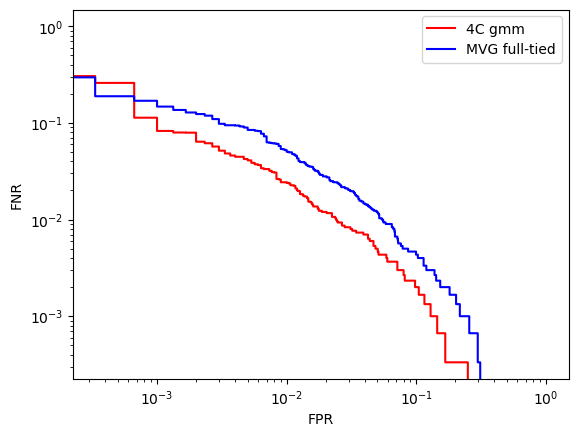

application: (0.5, 1, 1)
	Actual DCF for GMM 4C Tied: 0.030666666666666665
	Min DCF for GMM 4C Tied: 0.029666666666666668
	------------------------------------
	Actual DCF for MVG Tied Full: 0.048666666666666664
	Min DCF for MVG Tied Full: 0.04666666666666667
	------------------------------------
application: (0.1, 1, 1)
	Actual DCF for GMM 4C Tied: 0.09566666666666668
	Min DCF for GMM 4C Tied: 0.09000000000000001
	------------------------------------
	Actual DCF for MVG Tied Full: 0.12533333333333335
	Min DCF for MVG Tied Full: 0.12333333333333335
	------------------------------------
application: (0.9, 1, 1)
	Actual DCF for GMM 4C Tied: 0.08066666666666668
	Min DCF for GMM 4C Tied: 0.07833333333333332
	------------------------------------
	Actual DCF for MVG Tied Full: 0.13300000000000003
	Min DCF for MVG Tied Full: 0.12466666666666666
	------------------------------------


In [23]:
DET = True

mvg_llrs = util.pickle_load("./results/mvg/z-norm-llrs_tied_full_cov.bin")[(0.5, 1, 1)]
mvg_llrs = np.array(mvg_llrs)
print(llrs_gmm.shape, mvg_llrs.shape)
if DET:
    plot_labels = ["4C gmm", "MVG full-tied"]
    print("Plotting ROC plot...")
    plt.plot_ROC([llrs_gmm, mvg_llrs], labels, plot_labels)
    print("Plotting Bayes Error plot...")
    plt.bayes_error_plot([llrs_gmm, mvg_llrs], labels, plot_labels, [False, False])
    print("Plotting DET plot...")
    plt.plot_DET([llrs_gmm, mvg_llrs], labels, plot_labels)

dcf.compute_act_min_DCFs_from_scores([llrs_gmm, mvg_llrs], labels, applications, ["GMM 4C Tied", "MVG Tied Full"])

### SVM Models

In [2]:
DET = True

linear_svm_scores = util.pickle_load("./results/svm/balanced-raw-linear-svm.bin")[(0.5, 1, 1)][0.5]
quad_svm_scores = util.pickle_load("./results/svm/balanced-z-norm-quadratic-svm.bin")[(0.5, 1, 1)][0.5]
RBF_svm_scores = util.pickle_load("./results/svm/balanced-raw-RBF-svm.bin")[(0.5, 1, 1)][0.5]

plot_labels = ["linear SVM", "RBF SVM", "Poly(d=2) SVM"]
scores = [linear_svm_scores, RBF_svm_scores, quad_svm_scores]

Plotting Bayes Error plot...


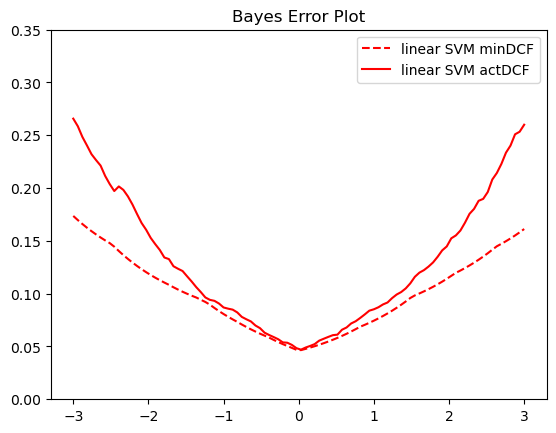

Plotting Bayes Error plot...


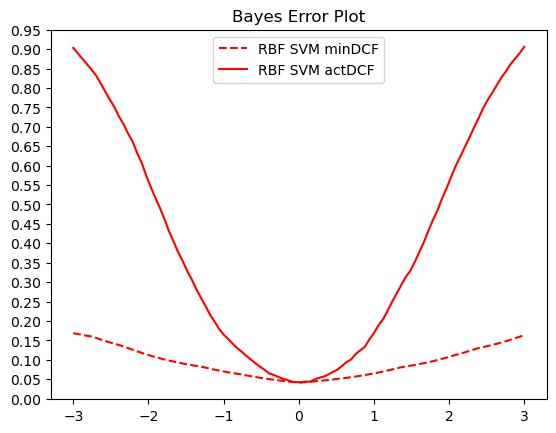

Plotting Bayes Error plot...


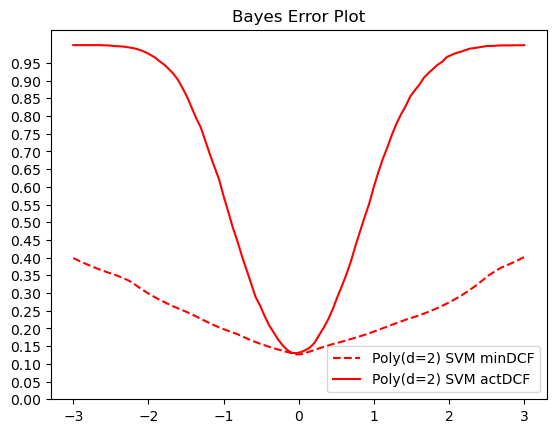

In [3]:


if DET:
    for score, label in zip(scores, plot_labels):
        print("Plotting Bayes Error plot...")
        plt.bayes_error_plot([score], labels, [label], [False, False])

### SVM scores recalibration

application: (0.5, 1, 1)
	Actual DCF for linear SVM: 0.047
	Min DCF for linear SVM: 0.046
	------------------------------------
	Actual DCF for RBF SVM: 0.042333333333333334
	Min DCF for RBF SVM: 0.04133333333333333
	------------------------------------
	Actual DCF for Poly(d=2) SVM: 0.12766666666666668
	Min DCF for Poly(d=2) SVM: 0.125
	------------------------------------
application: (0.1, 1, 1)
	Actual DCF for linear SVM: 0.18266666666666667
	Min DCF for linear SVM: 0.12866666666666668
	------------------------------------
	Actual DCF for RBF SVM: 0.6566666666666666
	Min DCF for RBF SVM: 0.12533333333333332
	------------------------------------
	Actual DCF for Poly(d=2) SVM: 0.991
	Min DCF for Poly(d=2) SVM: 0.3266666666666666
	------------------------------------
application: (0.9, 1, 1)
	Actual DCF for linear SVM: 0.16566666666666668
	Min DCF for linear SVM: 0.12366666666666667
	------------------------------------
	Actual DCF for RBF SVM: 0.6423333333333334
	Min DCF for RBF SVM:

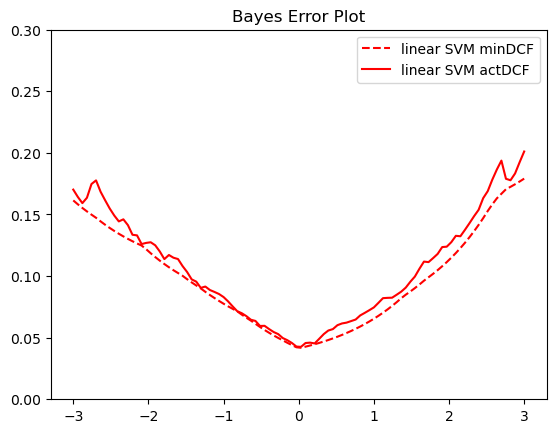

(1,)
(0.5, 1, 1)
RBF SVM ACT not calibrated: 0.04134073842302879 ACT: 0.0406794003868472 MIN 0.038659830469905565
(0.1, 1, 1)
RBF SVM ACT not calibrated: 0.663563829787234 ACT: 0.12997425759472067 MIN 0.11990485265673001
(0.9, 1, 1)
RBF SVM ACT not calibrated: 0.6403743315508021 ACT: 0.11942840482421209 MIN 0.11331636136079191


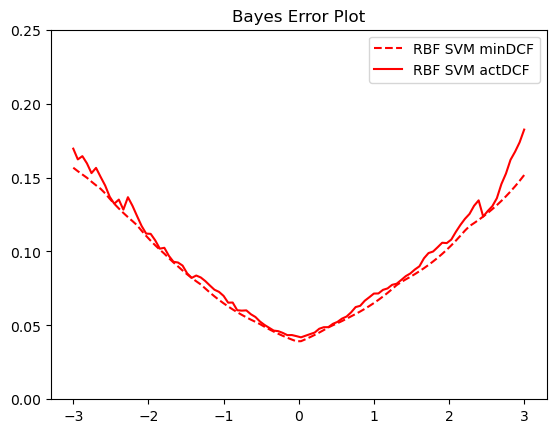

(1,)
(0.5, 1, 1)
Poly(d=2) SVM ACT not calibrated: 0.12670312322220958 ACT: 0.12466933098190922 MIN 0.12194931163954943
(0.1, 1, 1)
Poly(d=2) SVM ACT not calibrated: 0.9893617021276596 ACT: 0.33242191944476046 MIN 0.3156715781089998
(0.9, 1, 1)
Poly(d=2) SVM ACT not calibrated: 0.983957219251337 ACT: 0.3216165092729548 MIN 0.3021354818523154


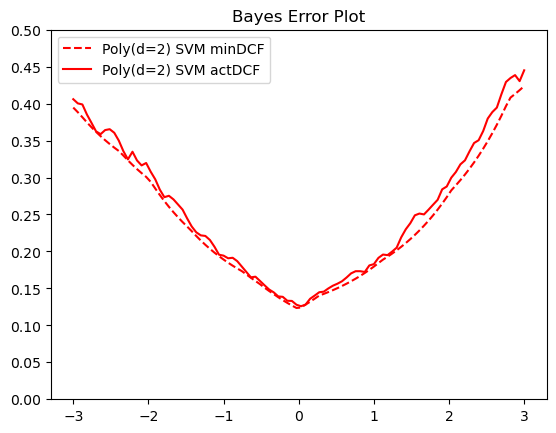

application: (0.5, 1, 1)
	Actual DCF for linear SVM: 0.04201985436340881
	Min DCF for linear SVM: 0.04136918306974627
	------------------------------------
	Actual DCF for RBF SVM: 0.0406794003868472
	Min DCF for RBF SVM: 0.038659830469905565
	------------------------------------
	Actual DCF for Poly(d=2) SVM: 0.12466933098190922
	Min DCF for Poly(d=2) SVM: 0.12194931163954943
	------------------------------------
application: (0.1, 1, 1)
	Actual DCF for linear SVM: 0.1319689384457845
	Min DCF for linear SVM: 0.12781957560587096
	------------------------------------
	Actual DCF for RBF SVM: 0.12997425759472067
	Min DCF for RBF SVM: 0.11990485265673001
	------------------------------------
	Actual DCF for Poly(d=2) SVM: 0.33242191944476046
	Min DCF for Poly(d=2) SVM: 0.3156715781089998
	------------------------------------
application: (0.9, 1, 1)
	Actual DCF for linear SVM: 0.1360756343156218
	Min DCF for linear SVM: 0.12595289566503587
	------------------------------------
	Actual DCF

In [18]:
# compute_act_DCF(scores, labels, pi, Cfn, Cfp, th=None)
scores = [linear_svm_scores, RBF_svm_scores, quad_svm_scores]
models_names = ["linear SVM", "RBF SVM", "Poly(d=2) SVM"]
dcf.compute_act_min_DCFs_from_scores(scores, labels, applications, models_names)

models_calibrated_scores = []
not_calibrated_scores = []
# scores = np.vstack([llrs_gmm, logreg_scores])
for score, label in zip(scores, models_names):
    calibration_set, evaluation_set, calibration_labels, evaluation_labels = util.calibration_set(score, labels, 0.5)
    cal_scores = lr.score_calibration(np.expand_dims(calibration_set, 0), np.expand_dims(evaluation_set, 0), calibration_labels)
    for application in applications:
        pi, Cfn, Cfp = application
        ACT_cal = dcf.compute_act_DCF(cal_scores, evaluation_labels, pi, Cfn, Cfp, th=None)
        ACT_not_cal = dcf.compute_act_DCF(evaluation_set, evaluation_labels, pi, Cfn, Cfp, th=None)
        MIN_cal = dcf.compute_min_DCF(evaluation_set, evaluation_labels, pi, 1, 1)
        print(application)
        print(label, "ACT not calibrated:", ACT_not_cal, "ACT:", ACT_cal, "MIN", MIN_cal)
    models_calibrated_scores.append(cal_scores)
    plt.bayes_error_plot([cal_scores], evaluation_labels, [label], [False, False])
    not_calibrated_scores.append(evaluation_set)
    
dcf.compute_act_min_DCFs_from_scores(models_calibrated_scores, evaluation_labels, applications, models_names)